# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
# Импорт необходимых библиотек
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

# from xgboost import XGBClassifier

import re

%matplotlib inline

In [2]:
# Импорт данных
df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
del df['Unnamed: 0'] # удаление артефактов
df.info() # Получение сведений о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [4]:
df.duplicated().sum()

0

1. В таблице 5986 записей.
2. Нет пропусков.
3. Нет дублирующихся записей.
4. Некоторые числовые поля имеют тип object.

In [5]:
pd.to_numeric(df.TotalCharges) # преобразование данных в числовой формат

ValueError: Unable to parse string " " at position 356

In [6]:
df.TotalCharges[356]

' '

4. В таблице в некоторых ячейках стоят пропуски. Определяю их количество и если их немного, то удаляю, если много - меняю на мединное.

In [7]:
# Проверка количества пропусков
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Text(0.5, 1.0, 'Распределение оттока клиентов')

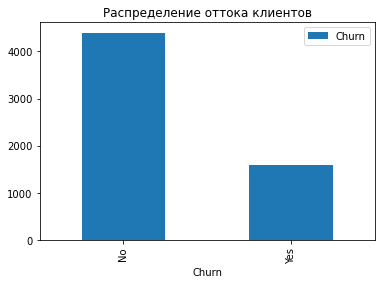

In [8]:
# Проверим объем данных по целевому показателю
df.groupby('Churn')['customerID'].count().plot(kind='bar',label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')

In [9]:
# Проверим сколько это из общего количества неотточных клиентов
df[df.TotalCharges == ' '].shape[0] / df.groupby('Churn')['customerID'].count()[0]

0.0022732439190725163

Все пропущенные значения по целевому показателю относятся к категории неотточных клиентов и в общем объеме составляют 0.23 % по данной категории. Можно удалять.

In [10]:
# Второй путь - замена на медианные величины
# 3. В таблице в некоторых ячейках стоят пропуски. Чтобы не портить статистику меняю их на медианные значения.
# # Поиск медианы
# TotalCharges_median = np.median([float(i) for i in df.TotalCharges if i != ' '])
# TotalCharges_median
# dfn = df.copy()
# # Замена пробелов на медиану и преобразование данных в числовой формат
# dfn.TotalCharges = dfn.TotalCharges.replace(' ',TotalCharges_median).astype(np.float64)
# dfn.dtypes

In [11]:
dfn = df.copy()
# Удаление записей с пропусками
dfn.TotalCharges = dfn.TotalCharges.replace(' ',np.nan).astype(np.float64)
dfn = dfn.dropna()
dfn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [12]:
print('|{:^20}|{:^15}|{:^20}|'.format('Поле', 'Тип данных', 'Уникальных значений'))
print('-'*59)
for column in dfn.columns:
    print('|{:<20}|{:^15}|{:^20}|'.format(str(column), str(dfn[column].dtypes), str(len(dfn[column].unique()))))

|        Поле        |  Тип данных   |Уникальных значений |
-----------------------------------------------------------
|customerID          |    object     |        5976        |
|gender              |    object     |         2          |
|SeniorCitizen       |     int64     |         2          |
|Partner             |    object     |         2          |
|Dependents          |    object     |         2          |
|tenure              |     int64     |         72         |
|PhoneService        |    object     |         2          |
|MultipleLines       |    object     |         3          |
|InternetService     |    object     |         3          |
|OnlineSecurity      |    object     |         3          |
|OnlineBackup        |    object     |         3          |
|DeviceProtection    |    object     |         3          |
|TechSupport         |    object     |         3          |
|StreamingTV         |    object     |         3          |
|StreamingMovies     |    object     |  

В ИД есть текстовые поля в которых содержится всего 2 значения. Также есть поля с 3, 4 значениями. Категоризирую их переведя в числовой формат.

In [13]:
# Классификация методами pandas и подготовка словаря для расшифровки
main_dic = {} # словарь для расшифровки
for column in dfn.columns:
    if len(dfn[column].unique())<5: # категоризируем поля в которых менее 5 уникальных значений
        main_dic[column]={} 
        for n, category in enumerate(dfn[column].astype('category').cat.categories.to_list()):
            main_dic[column][category]=n
            
        dfn[column] = dfn[column].astype('category').cat.codes
main_dic

{'gender': {'Female': 0, 'Male': 1},
 'SeniorCitizen': {0: 0, 1: 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3},
 'Churn': {'No': 0, 'Yes': 1}}

In [14]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   int8   
 2   SeniorCitizen     5976 non-null   int8   
 3   Partner           5976 non-null   int8   
 4   Dependents        5976 non-null   int8   
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   int8   
 7   MultipleLines     5976 non-null   int8   
 8   InternetService   5976 non-null   int8   
 9   OnlineSecurity    5976 non-null   int8   
 10  OnlineBackup      5976 non-null   int8   
 11  DeviceProtection  5976 non-null   int8   
 12  TechSupport       5976 non-null   int8   
 13  StreamingTV       5976 non-null   int8   
 14  StreamingMovies   5976 non-null   int8   
 15  Contract          5976 non-null   int8   
 16  PaperlessBilling  5976 non-null   int8   


### Заключение по блоку 1:
<br>
- В исходных данных содержится 5986 записей. <br>
- Есть незначительное (0,23% от неотточных клиентов) количество пропущенных значений (в поле TotalCharges имеются "скрытые" пропуски в виде пробелов). Из дальнейшей работы исключены. <br>

# 2. Исследование зависимостей и формулирование гипотез

<AxesSubplot:title={'center':'Корреляция признаков'}>

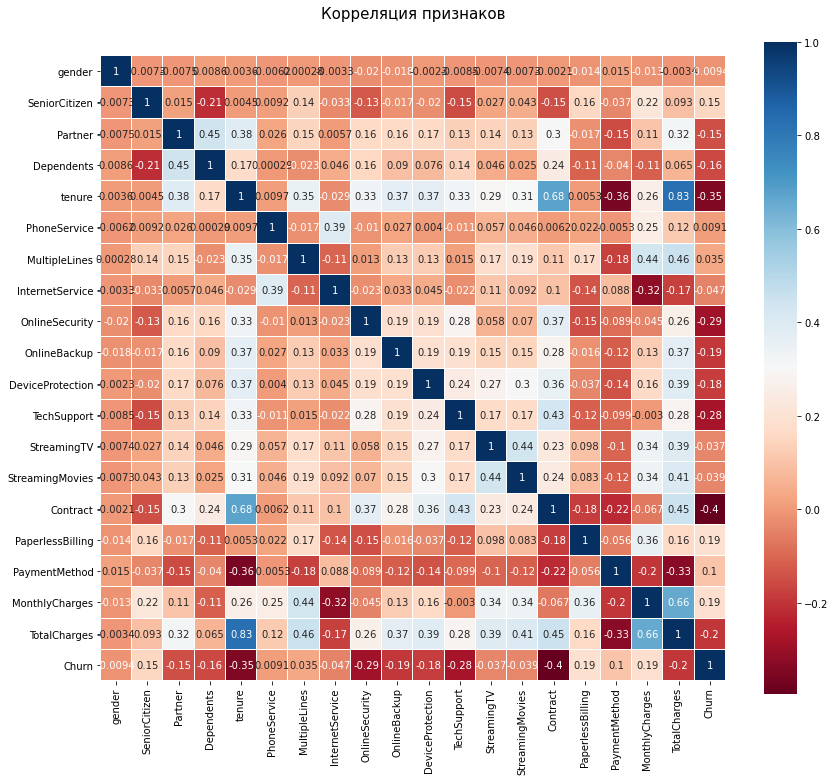

In [15]:
# Постороение тепловой карты зависимостей
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Корреляция признаков', y=1.05, size=15)
sns.heatmap(dfn.iloc[:, 1:].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Определим перечень самых сильных корреляций (примем, что это корреляция > 0.8).

In [16]:
# Подготовка описания полей для дальнейшего использования
s='''     customerID – id клиента
     gender – пол клиента (male/female)
     SeniorCitizen – яляется ли клиент пенсионером (1, 0)
     Partner – состоит ли клиент в браке (Yes, No)
     Dependents – есть ли у клиента иждивенцы (Yes, No)
     tenure – сколько месяцев человек являлся клиентом компании
     PhoneService – подключена ли услуга телефонной связи (Yes, No)
     MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
     InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
     OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
     OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
     DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
     TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
     StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
     StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
     Contract – тип контракта клиента (Month-to-month, One year, Two year)
     PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
     PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
     MonthlyCharges – месячный размер оплаты на настоящий момент
     TotalCharges – общая сумма, которую клиент заплатил за услуги за все время
     Churn – произошел ли отток (Yes or No)'''
s = s.replace('     ', '')

fields = {}
for data in s.split('\n'):
    temp_data = data.split(' – ')
    fields[temp_data[0]] = temp_data[1]

In [17]:
# Поиск наиболее сильных зависимостей
dfn_corr = dfn.iloc[:, 1:].corr()
best_corr = []
for row in dfn_corr.iterrows():
    for i in range(len(row[1])):
        if (row[1][i] > 0.8) and (row[1][i] < 1): 
            if row[1][i] not in best_corr:
                best_corr.append(row[1][i])
                print('{} ({}) и {} ({}). Корреляция = {}\n'.format(row[0], fields[row[0]], row[1].keys()[i], fields[row[1].keys()[i]], row[1][i]))

tenure (сколько месяцев человек являлся клиентом компании) и TotalCharges (общая сумма, которую клиент заплатил за услуги за все время). Корреляция = 0.8274387477712776



? Таким образом из анализа можно исключить TotalCharges (можно определить по величине tenure), StreamingTV и StreamingMovies (можно определить по величине MonthlyCharges).

In [18]:
# dfn = dfn.drop(['TotalCharges', 'StreamingTV', 'StreamingMovies'], axis=1)
# dfn

In [19]:
# for i in dfn_corr.Churn.sort_values(ascending=False).keys():
#     if 0.16 < dfn_corr.Churn[i] < 1:
#         print('{} ({}). Корреляция = {}'.format(i, fields[i], dfn_corr.Churn[i]))

In [20]:
# # Обратные зависимости
# for i in dfn_corr.Churn.sort_values(ascending=False).keys():
#     if dfn_corr.Churn[i] < -0.3:
#         print('{} ({}). Корреляция = {}'.format(i, fields[i], dfn_corr.Churn[i]))

array([[<AxesSubplot:title={'center':'TotalCharges'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>],
       [<AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>],
       [<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>,
        <Axes

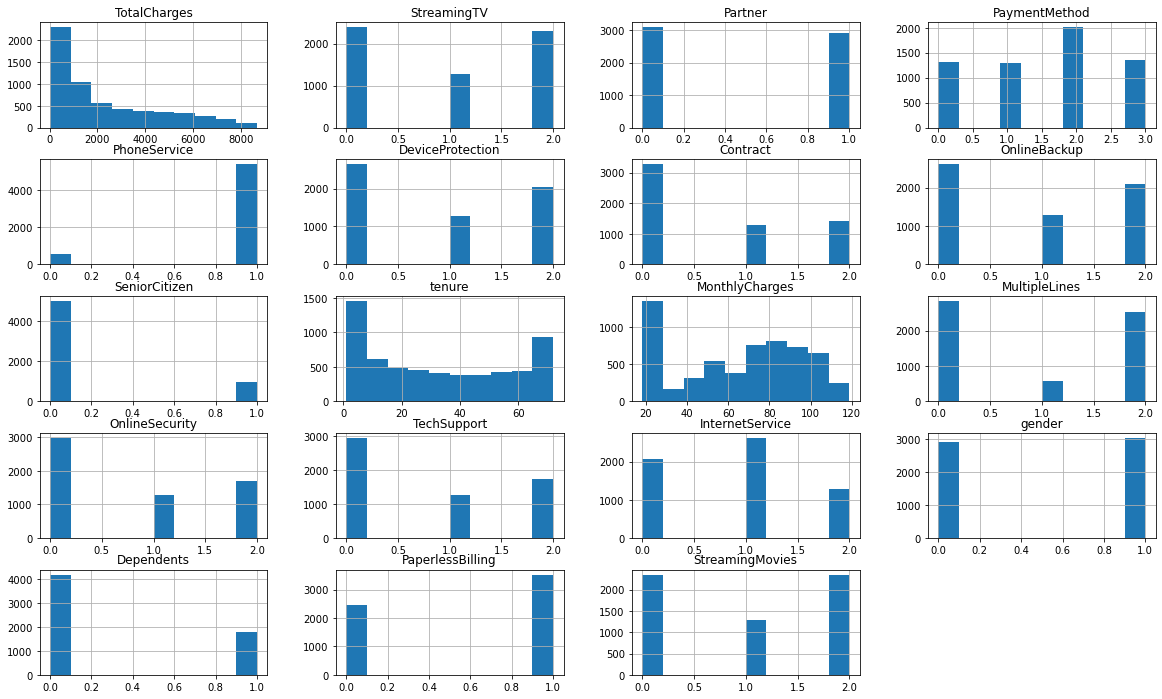

In [21]:
features = list(set(dfn.columns) - set(['customerID', 'Churn']))
dfn[features].hist(figsize=(20, 12))

CPU times: user 1min 29s, sys: 652 ms, total: 1min 29s
Wall time: 1min 28s


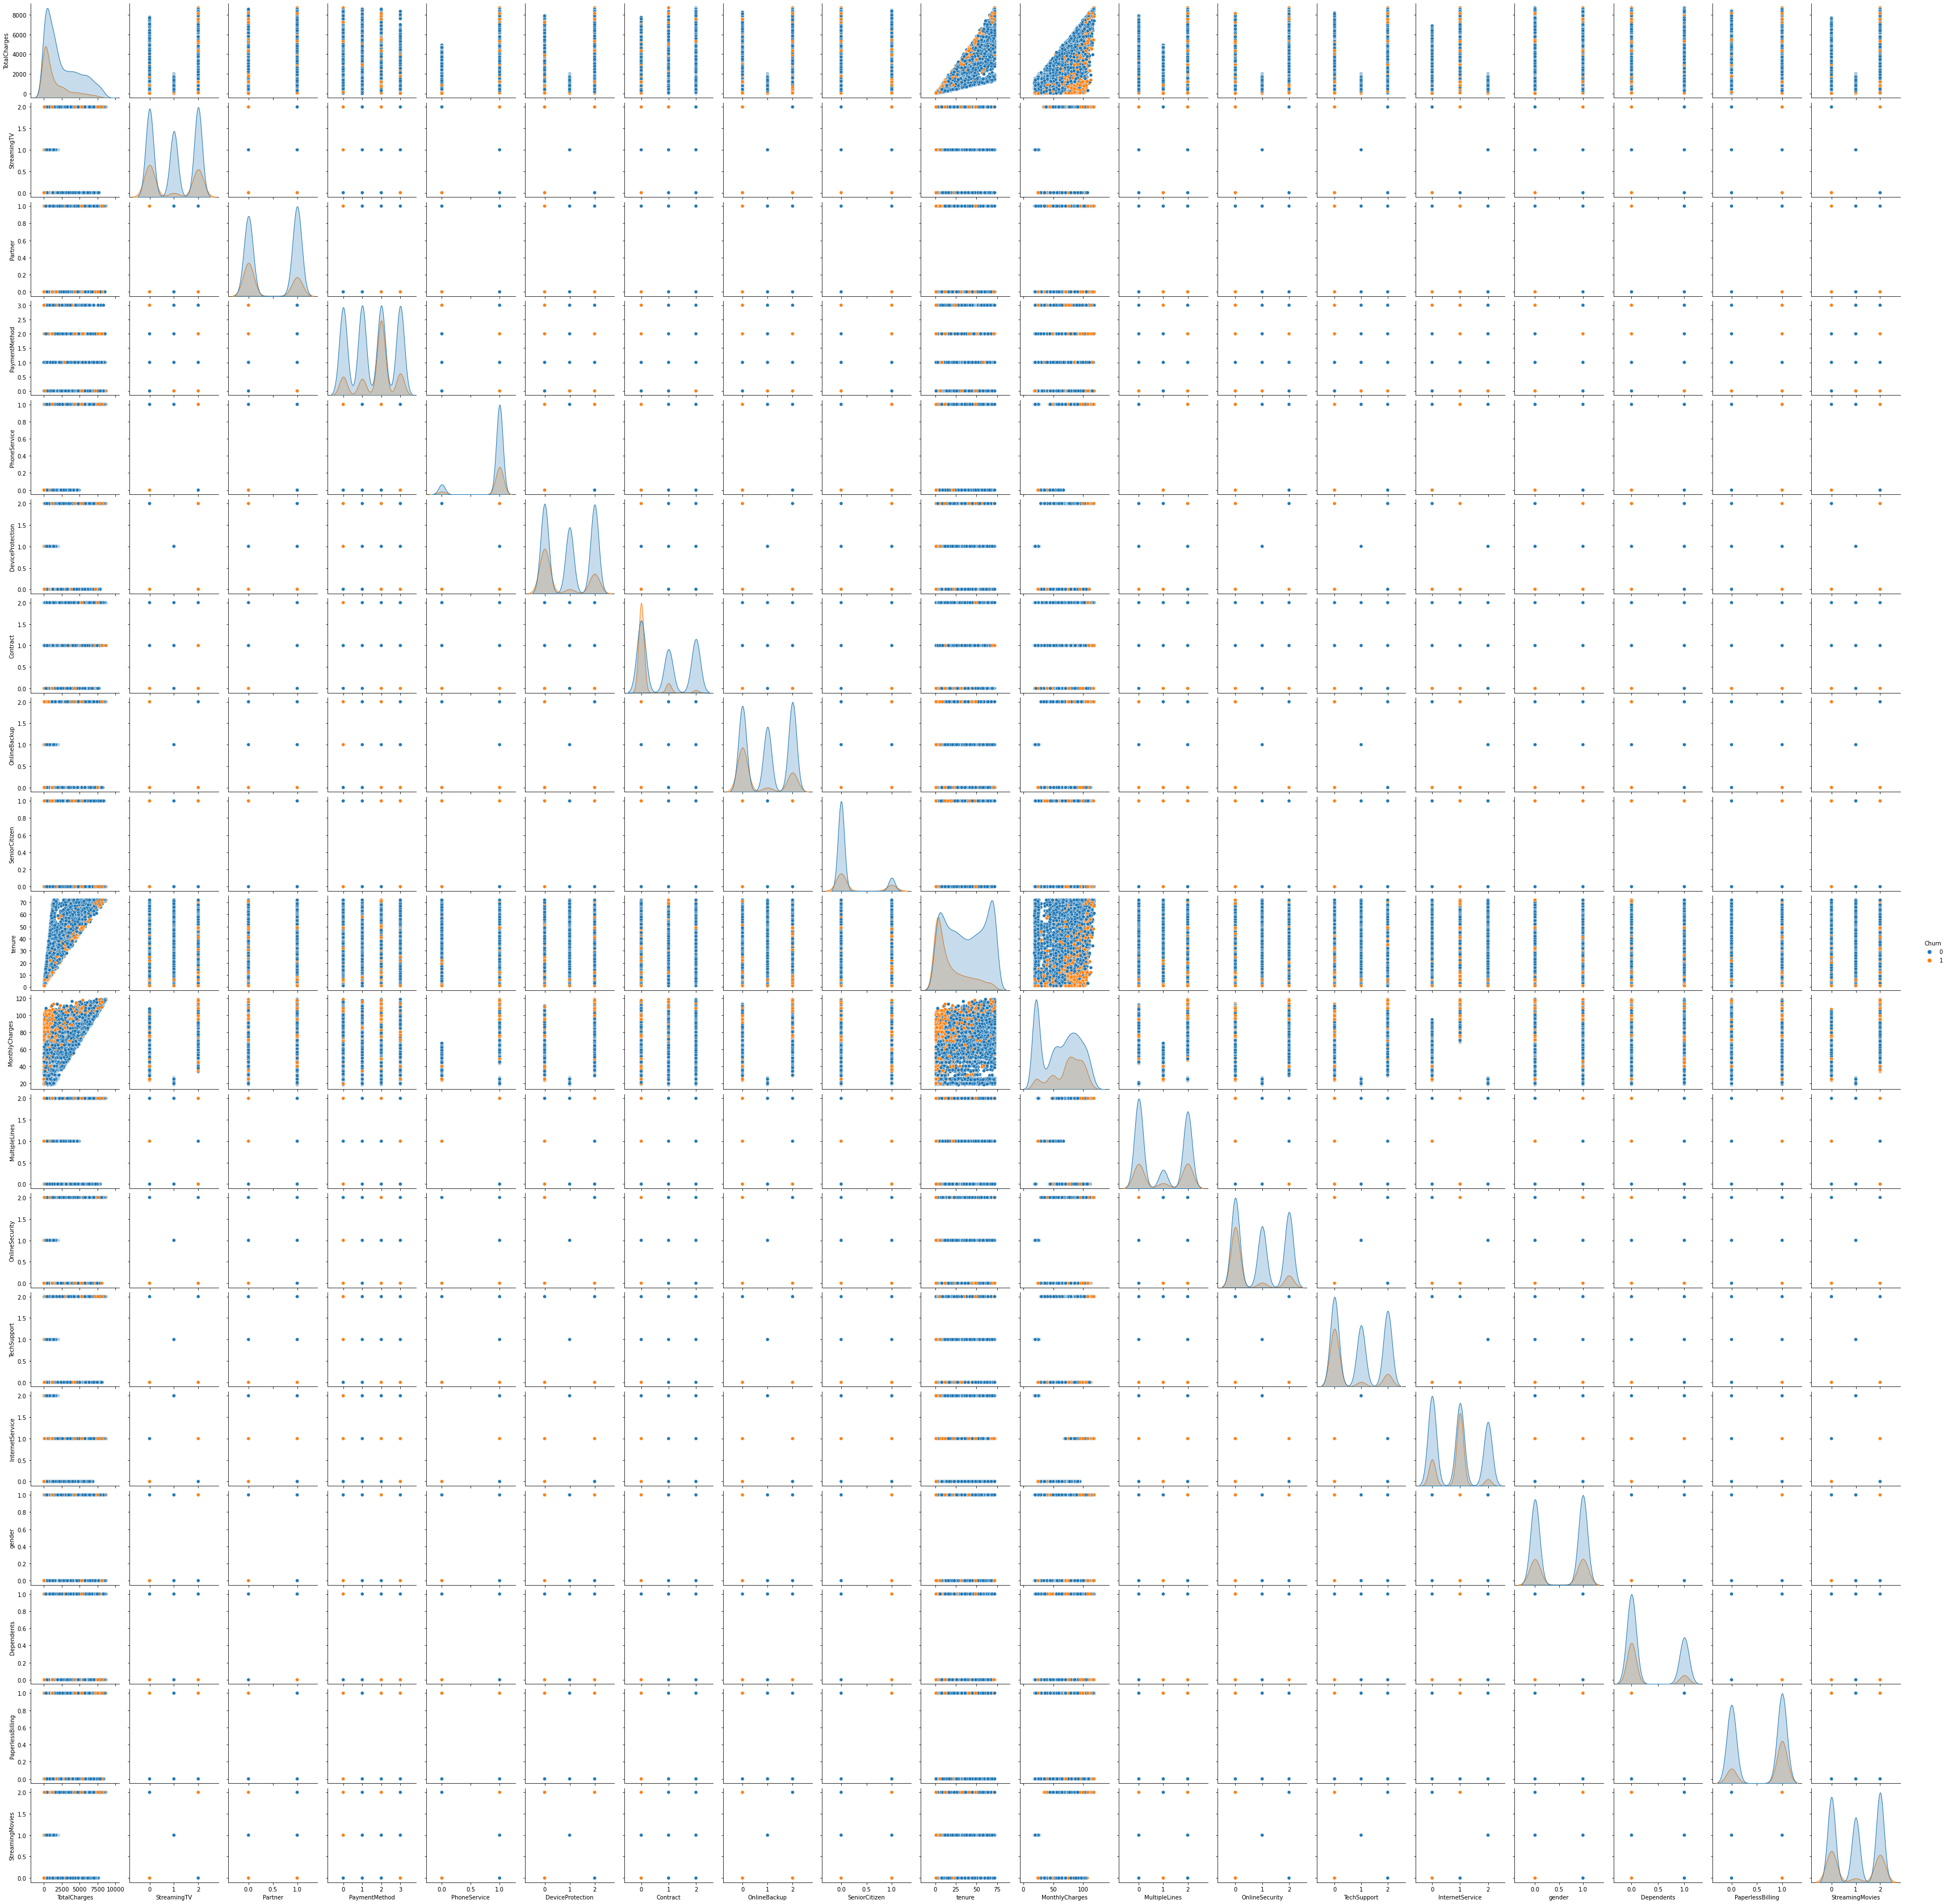

In [22]:
%%time

# Построение диаграмы рассеяния
sns.pairplot(dfn[features + ['Churn']], hue='Churn')

Тут сложно что-либо понять. Какие-то явно бросающиеся в глаза связи не видно.

Выясним какие показатели отличаются у отточных и не отточных клиентов, построив диаграмы boxplot.

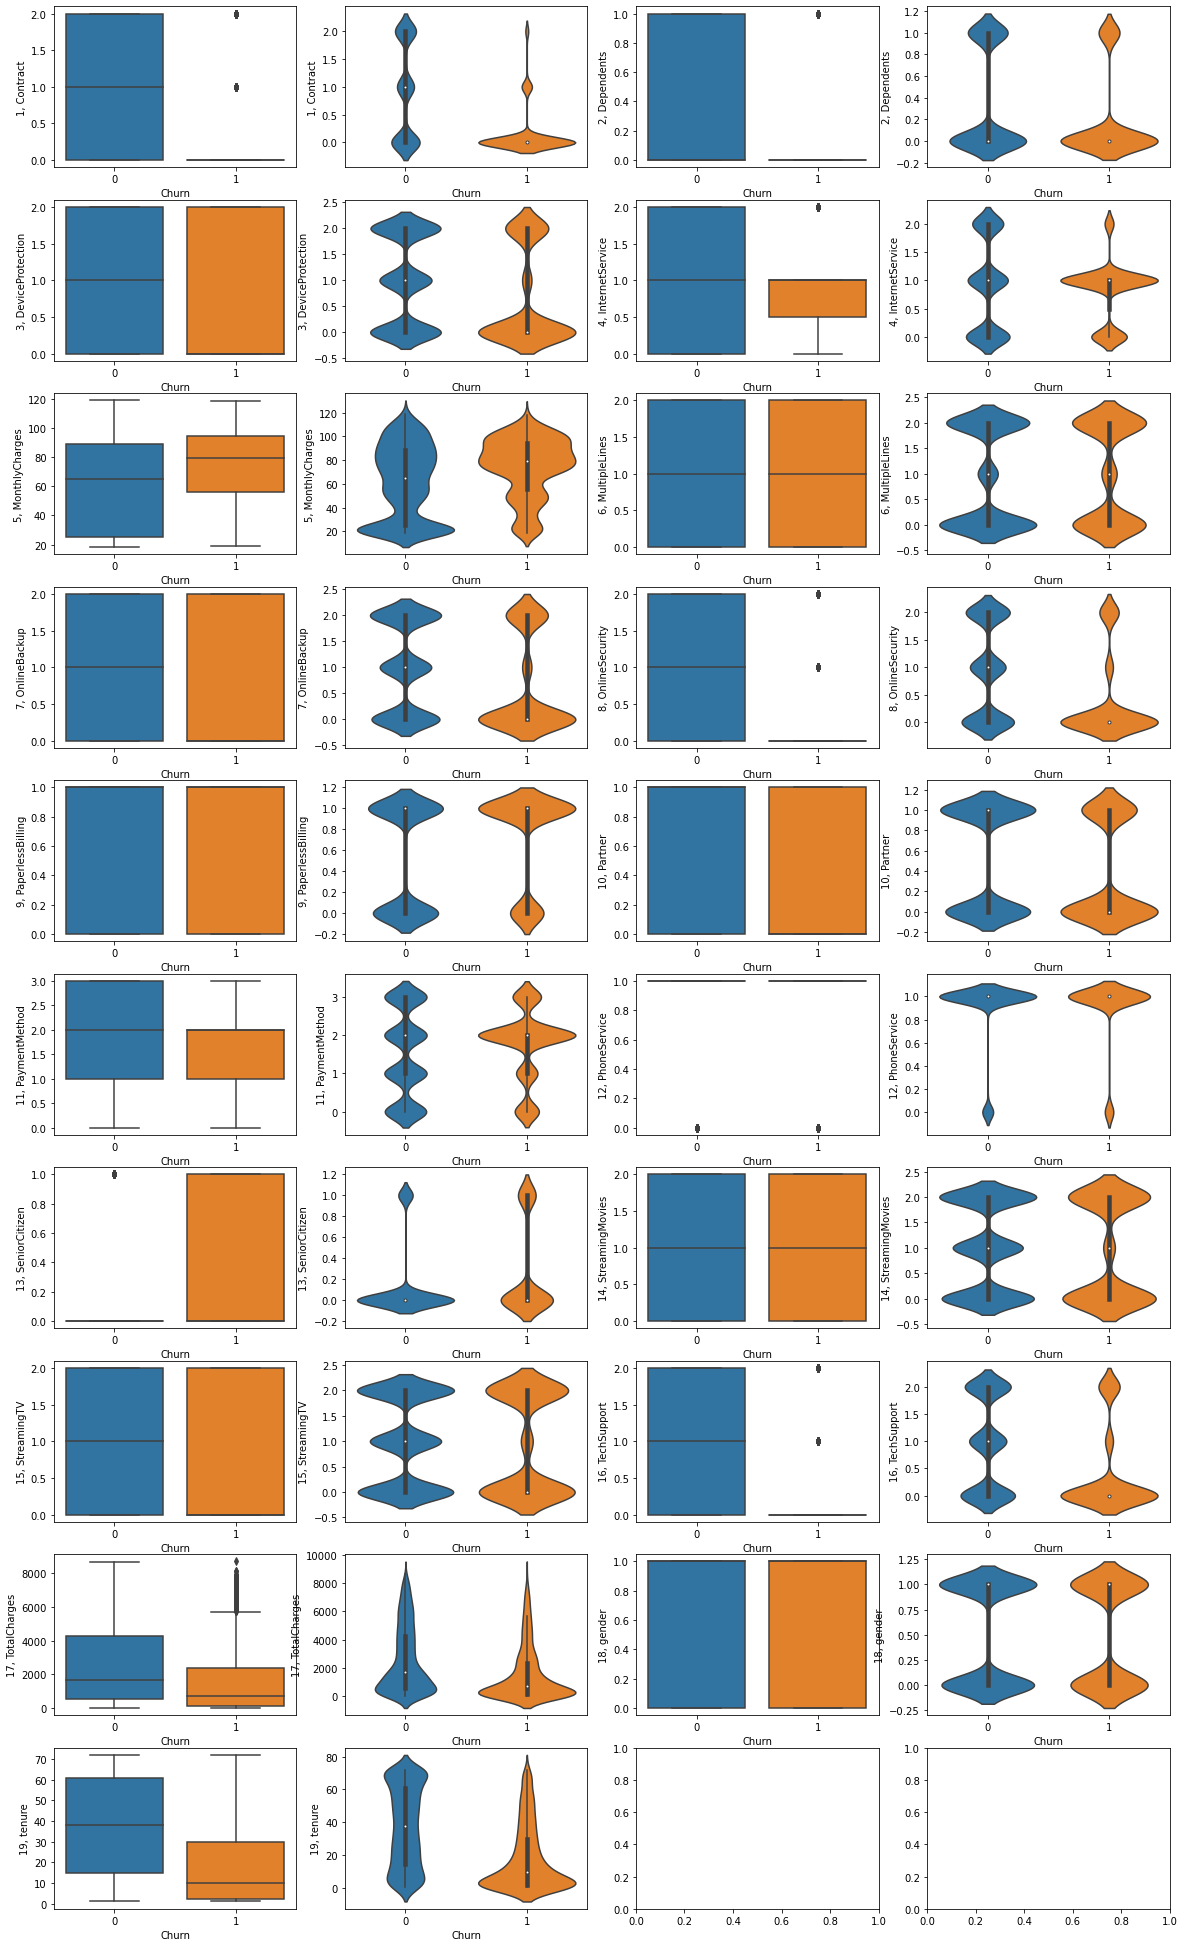

In [23]:
# Подготовка данных для создания графиков
features = list(set(dfn.columns) - set(['customerID', 'Churn']))
features = (features * 2)
features.sort()

# Создание графиков
# labels = dfn.describe().columns

figsize = (20, 35)
cols = 4
rows = len(features) // cols + 1

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)

i=1 # Порядковый номер графика

for idx, feat in enumerate(features):
    if (idx  % cols == 0) or (idx  % cols == 2):
        sns.boxplot(x='Churn', y=feat, data=dfn, ax=axes[idx // cols, idx  % cols])
#         axes[idx // cols, idx % cols].legend()
        axes[idx // cols, idx % cols].set_xlabel('Churn')
        axes[idx // cols, idx % cols].set_ylabel('{}, {}'.format(i, feat))
    else:
        sns.violinplot(x='Churn', y=feat, data=dfn, ax=axes[idx // cols, idx  % cols])
#         axes[idx // cols, idx % cols].legend()
        axes[idx // cols, idx % cols].set_xlabel('Churn')
        axes[idx // cols, idx % cols].set_ylabel('{}, {}'.format(i, feat))
        i+=1


В блоке 3 определим наиболее сильные признаки, влияющие на целевой показатель.

**Гипотеза - чем больше заплатил клиент за всё время, тем меньше у него размер ежемесячного платежа.**

In [24]:
# Подготовка данных для постороения графиков
lenght = np.linspace(min(dfn.tenure), max(dfn.tenure), 20) # Разбивка времени пользования услугами на 20 отрезков

lenghts = []
MonthlyCharges_NoChurn_means = []
MonthlyCharges_Churn_means = []
TotalCharges_NoChurn_means = []
TotalCharges_Churn_means = []

# Вычисление средних ежемесячного и общего платежа
for i in range(len(lenght)-1):
    monthly_charges_mean = dfn[dfn.tenure.between(int(lenght[i]), int(lenght[i+1]), inclusive=False)].groupby('Churn')['MonthlyCharges'].mean()
    total_charges_mean = dfn[dfn.tenure.between(int(lenght[i]), int(lenght[i+1]), inclusive=False)].groupby('Churn')['TotalCharges'].sum() / \
dfn[dfn.tenure.between(int(lenght[i]), int(lenght[i+1]), inclusive=False)].groupby('Churn')['tenure'].sum()

#     print('Клиенты пользующиеся услугами компании от {} до {} месяцев:'.format(int(lenght[i]), int(lenght[i+1])))
#     print('Средняя величина ежемесячного платежа:')
#     print(monthly_charges_mean)
#     print('Средняя величина ежемесячного платежа за всё время:')
#     print(total_charges_mean)
#     print()
    
    lenghts.append('{} - {} мес.'.format(int(lenght[i]), int(lenght[i+1])))
    MonthlyCharges_NoChurn_means.append(monthly_charges_mean[0])
    MonthlyCharges_Churn_means.append(monthly_charges_mean[1])
    TotalCharges_NoChurn_means.append(total_charges_mean[0])
    TotalCharges_Churn_means.append(total_charges_mean[1])

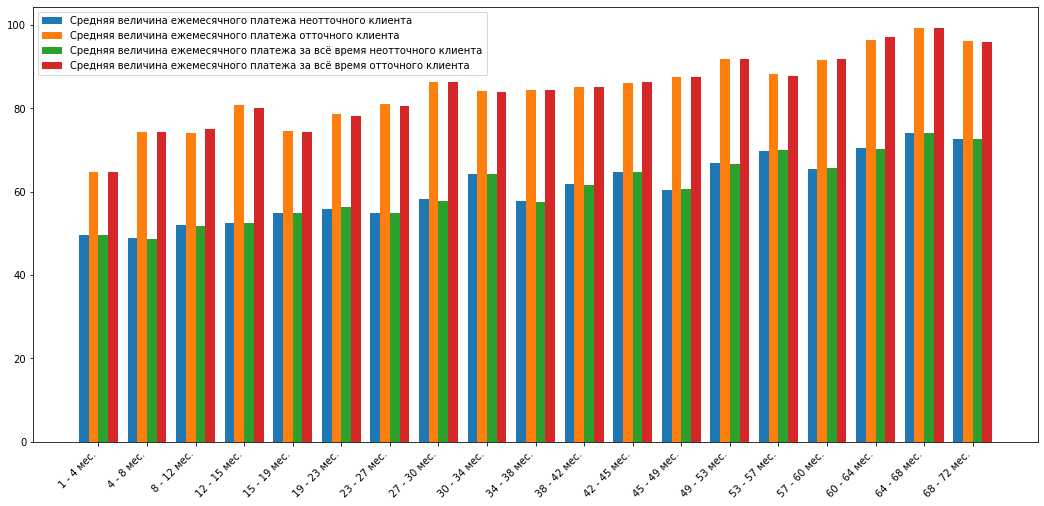

In [25]:
# Построение графиков
fig, ax = plt.subplots(figsize=(18, 8))

x = np.arange(len(lenghts))
width = 0.2

ax.bar(x - 1.5 * width, MonthlyCharges_NoChurn_means, width, label='Средняя величина ежемесячного платежа неотточного клиента')
ax.bar(x - width/2, MonthlyCharges_Churn_means, width, label='Средняя величина ежемесячного платежа отточного клиента')
ax.bar(x + width/2, TotalCharges_NoChurn_means, width, label='Средняя величина ежемесячного платежа за всё время неотточного клиента')
ax.bar(x + 1.5 * width, TotalCharges_Churn_means, width, label='Средняя величина ежемесячного платежа за всё время отточного клиента')       

plt.xticks(rotation=45, ha="right")
ax.set_xticks(x)
ax.set_xticklabels(lenghts)
plt.legend()
plt.show()

plt.show()

**Гипотеза опровергнута - зависимость ежемесячного платежа от конечной суммы всех платежей отсутсвует, что также подтвердается картой зависимостей. Отточные клиенты по другой причине платят больше.
Судя по данным этой причиной могут быть подключенные интернет сервисы, соответственно и величина ежемесячного платежа у данных клиентов выше. <br>
Также по графику можно сделать заключение - тарифная сетка со временем практически не менятся - сколько абонент платит сейчас, столько же он в среднем платил всегда. При этом новые клиенты платят меньше, чем старые.**

Проверим среди клиентов пользующихся интернет услугами.

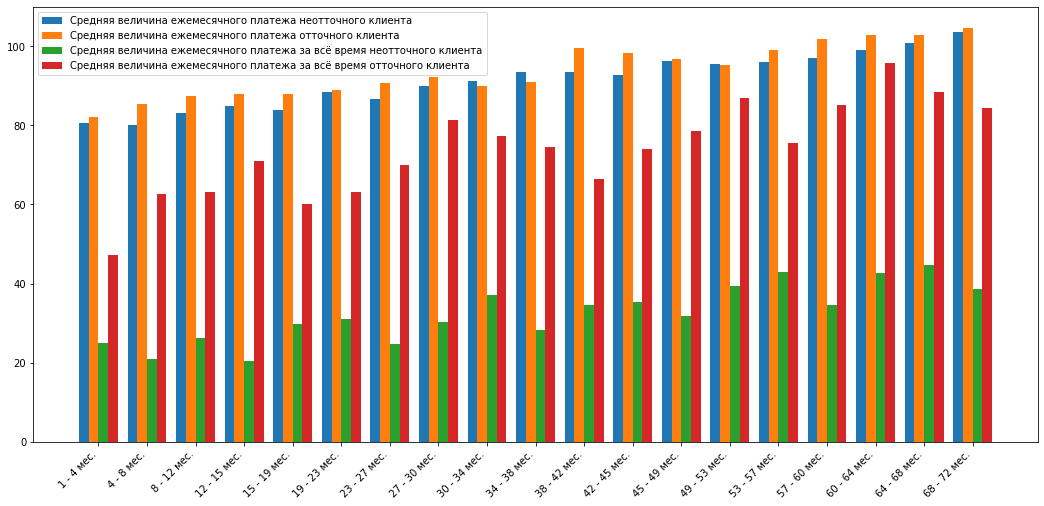

In [26]:
lenghts = []
MonthlyCharges_NoChurn_means = []
MonthlyCharges_Churn_means = []
TotalCharges_NoChurn_means = []
TotalCharges_Churn_means = []


for i in range(len(lenght)-1):
    monthly_charges_mean = dfn[(dfn.tenure.between(int(lenght[i]), int(lenght[i+1]), inclusive=False)) & \
                               (dfn.InternetService == 1)].groupby('Churn')['MonthlyCharges'].mean()
    total_charges_mean = dfn[(dfn.tenure.between(int(lenght[i]), int(lenght[i+1]), inclusive=False)) & \
                               (dfn.InternetService == 1)].groupby('Churn')['TotalCharges'].sum() / \
dfn[dfn.tenure.between(int(lenght[i]), int(lenght[i+1]), inclusive=False)].groupby('Churn')['tenure'].sum()

#     print('Клиенты пользующиеся услугами компании от {} до {} месяцев:'.format(int(lenght[i]), int(lenght[i+1])))
#     print('Средняя величина ежемесячного платежа:')
#     print(monthly_charges_mean)
#     print('Средняя величина ежемесячного платежа за всё время:')
#     print(total_charges_mean)
#     print()
    
    lenghts.append('{} - {} мес.'.format(int(lenght[i]), int(lenght[i+1])))
    MonthlyCharges_NoChurn_means.append(monthly_charges_mean[0])
    MonthlyCharges_Churn_means.append(monthly_charges_mean[1])
    TotalCharges_NoChurn_means.append(total_charges_mean[0])
    TotalCharges_Churn_means.append(total_charges_mean[1])

# Построение графиков
fig, ax = plt.subplots(figsize=(18, 8))

x = np.arange(len(lenghts))
width = 0.2

ax.bar(x - 1.5 * width, MonthlyCharges_NoChurn_means, width, label='Средняя величина ежемесячного платежа неотточного клиента')
ax.bar(x - width/2, MonthlyCharges_Churn_means, width, label='Средняя величина ежемесячного платежа отточного клиента')
ax.bar(x + width/2, TotalCharges_NoChurn_means, width, label='Средняя величина ежемесячного платежа за всё время неотточного клиента')
ax.bar(x + 1.5 * width, TotalCharges_Churn_means, width, label='Средняя величина ежемесячного платежа за всё время отточного клиента')       

plt.xticks(rotation=45, ha="right")
ax.set_xticks(x)
ax.set_xticklabels(lenghts)
plt.legend()

plt.show()

In [27]:
# Ежемесячные платежи отточных и неотточных клиентов в зависимости от типа интернет сервисов
dfn.groupby(['InternetService','Churn'])['MonthlyCharges'].mean()

InternetService  Churn
0                0        60.290372
                 1        48.885516
1                0        93.908952
                 1        88.239413
2                0        21.143297
                 1        20.433333
Name: MonthlyCharges, dtype: float64

In [28]:
# Итоговые платежи отточных и неотточных клиентов в зависимости от типа интернет сервисов
dfn.groupby(['InternetService','Churn']).TotalCharges.mean()

InternetService  Churn
0                0        2440.045171
                 1         783.771411
1                0        4147.735547
                 1        1953.317232
2                0         703.009359
                 1         189.269697
Name: TotalCharges, dtype: float64

Все клиенты (отточные и неотточные), пользующиеся услугами интернет сервисов, ежемесячно платят приблизительно одинаковую сумму. Однако сумма итоговых платежей у отточных клиентов выше. Почему? Возможно берется плата за подключение или аренду техники.

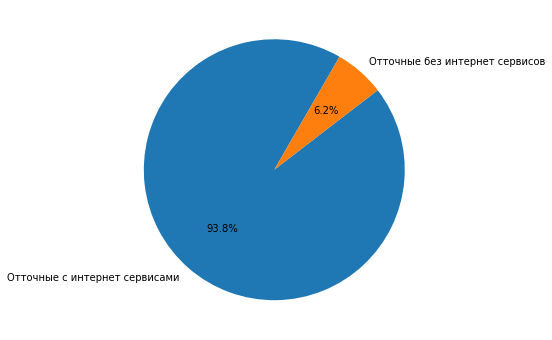

In [29]:
# Посмотрим сколько среди отточных клиентов пользуется интернет сервисами
labels = 'Отточные с интернет сервисами', 'Отточные без интернет сервисов'
sizes = [dfn[(dfn.Churn == 1) & (dfn.InternetService < 2)].groupby('Churn')['Churn'].count()[1], 
         dfn[(dfn.Churn == 1) & (dfn.InternetService == 2)].groupby('Churn')['Churn'].count()[1]]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)

plt.show()

Каков процент клиентов среди неотточных пользуется интернет сервисами? Данные клиенты могут стать отточными! Компании нужно уделить этому внимание.
Это клиенты пользующиеся интернет сервисами и являющиеся клиентами менее 30 мес (третий квантиль отточных клиентов).

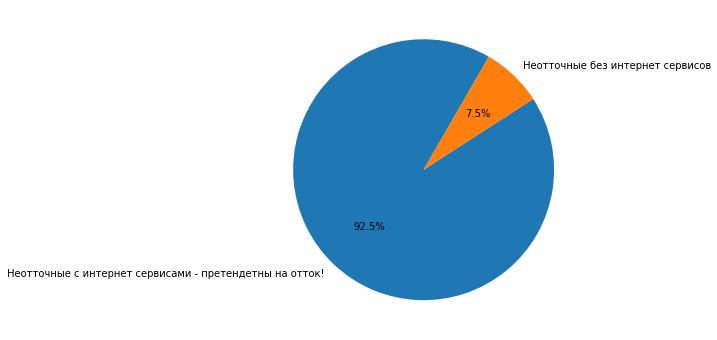

In [30]:
labels = 'Неотточные с интернет сервисами - претендетны на отток!', 'Неотточные без интернет сервисов'
sizes = [dfn[(dfn.Churn == 0) & (dfn.InternetService < 2) & (dfn.tenure < dfn[dfn.Churn == 1].tenure.quantile(.75))].groupby('Churn')['Churn'].count()[0], 
         dfn[(dfn.Churn == 1) & (dfn.InternetService == 2)].groupby('Churn')['Churn'].count()]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)

plt.show()

In [31]:
# Доп. запрос для выводов
# dfn.groupby('Churn').MonthlyCharges.describe().T

### Заключение по блоку 2:

Из boxplot-ов видно:
1. У большинства отточных клиентов тип контракта "Month-to-month".
2. У отточных клиентов иждивенцев меньше чем у неотточных.
3. У отточных клиентов отсутсвует страховка оборудования в том числе и из-за отсутсвия интернет услуг.
4. Отточные клиенты либо не пользуются услугами интернет-провайдера, либо имеют подключение Fiber optic.
5. Средний месячный размер оплаты у отточыых клиентов выше на 17 %.
6. У всех типов клиентов подключены несколько телефонных линий.
7. У большиства отточных клиентов при наличии возможности не подключена услуга online backup. У не отточных распределение равномерно.
8. У большиства отточных клиентов при наличии возможности не подключена ли услуга онлайн-безопасности. У не отточных распределение равномерно.
9. Значительная часть отточных клиентов пользуются безбумажным биллингом. У неотточных распределение равномерно.
10. Среди отточных клиентов большинство не состоит в браке.
11. Значительная часть отточных клиентов используют метод оплаты Electronic check. У неотточных распределение равномерно.
12. Все клиенты одинаково пользуются услугами телефонной связи.
13. Среди отточных клиентов ~ 25% пенсионеры.
14. Около половины отточных клиентов пользуются услугими стримингового кинотеатра. Незначительное количество отточных клиентов не имеет возможности ими пользоваться ввиду отсутствия интернет услуг. Среди неотточных распределение равномерное.
15. Около половины отточных клиентов пользуются услугими стримингового телевидения. Незначительное количество отточных клиентов не имеет возможности ими пользоваться ввиду отсутствия интернет услуг. Среди неотточных распределение равномерное.
16. У значительного количества отточных клиентов не подключена ли услуга технической поддержки, в некоторых случаях ввиду отсутствия интернет услуг.
17. Общая сумма, которую заплатили за услуги за все время у отточных клиентов меньше.
18. Среди отточных и неотточных клиентов одиноковое распределение по гендерному признаку.
19. Клиент становится отточным в среднем через 10 месяцев. Данный показатель значительно выше среди неотточных клиентов.

Дополнительные заключения:

По выводу 1 можно заключить, что компании не выгодно заключать контракты типа Month-to-month т.к. основной отток клиентов по данному виду контрактов.

По выводам 2 и 4 можно предположить, что у клиентов состоящих в браке и имеющих иждивенцев более размеренная жизнь и по-этому они реже меняют оператора.

По выводам 3, 4, 7, 8, 14, 15, 16 можно заключить, что половина отточных клиентов пользуется услугами которые предполагают наличие интернета. При этом среди неотточных данными услугами пользутся треть. Можно сделать предположение, что качество интернета в компании не самое лучшее. Для изучения данной гипотезы нужно больше данных.

По выводу 5 можно заключить, что отточные клиенты платят в месяц в среднем на 13 у.е. (17 %) больше, чем неотточные. Возможно, это и является одной из сильных причин оттока клиентов.

Также компании нужно уделить внимание клиентам, пользующимся интернет сервисами и являющимися клиентами менее 30 мес - это наиболее вероятные претенденты на отток.

# 3. Построение моделей для прогнозирования оттока

Подготовка данных

In [32]:
# Выбор данных для обучения и целевого показателя
X = dfn.drop(['customerID', 'Churn'], axis=1)
y = dfn['Churn']

# Подготовка обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Центровка и стандартизация данных путём их масштабирования. 
# Масштабирование выполняется из-за того, что разные величины выражены 
# в разных единицах измерения. Эта процедура позволяет организовать 
# «честную схватку» между признаками при определении их важности
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Обучение baseline модели с целью определения признаков которые в наибольшей степени влияют на целевой показатель. <br>
Поскольку данная задача - это задача классификации, то подойдут все модели, умеющие классифицировать. В качесте baseline модели выберем RandomForestClassifier.

In [33]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc_model = rfc.fit(X_train_scaled, y_train)

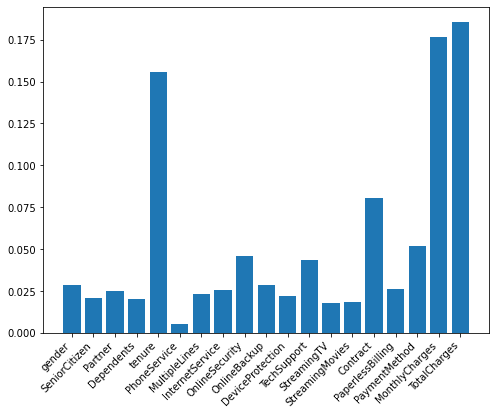

In [34]:
# Определение признаков которые в наибольшей степени влияют на целевой показатель (примем данный показатель > 0.05)
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(dfn.drop(['customerID', 'Churn'], axis=1).columns, rfc_model.feature_importances_)

plt.xticks(rotation=45, ha="right")
plt.show()

In [35]:
# Вариант 1
# for feature, importance in zip(dfn.drop(['customerID', 'Churn'], axis=1).columns, rfc_model.feature_importances_):
#     if importance>0.06:
#         print('Влияние признака {} на целевой показатель = {}'.format(feature, importance))
        
# Вариант 2
feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances.head(7)

,Features,Importance
0,TotalCharges,0.185529
1,MonthlyCharges,0.176602
2,tenure,0.155682
3,Contract,0.080678
4,PaymentMethod,0.051649
5,OnlineSecurity,0.046115
6,TechSupport,0.043407


**Доп выводы к блоку 2:**<br>
Подтвердились наблюдения - сильное вляние на целевой показатель оказывает:
- величина ежемесячного размера оплаты на настоящий момент,
- количество месяцев которые человек являлся клиентом компании,
- конечная сумма заплаченых денег оператору.

**Собственно обучение моделей**

In [36]:
# Возьмем уже обученную модель rfc и проверим ее точность на тестовых данных - метрика от которой будем отталкиваться
predictions = rfc_model.predict(X_test_scaled)
accuracy_score(y_test, predictions)

0.8032128514056225

80 % не самый высокий показатель. Однако, это модель из коробки. Попробуем подобрать для нее параметры.

In [37]:
%%time

parameters = {'n_estimators': range(100, 1000, 100), # число деревьев
              'max_depth': range(2, 12, 2), # максимальная глубина деревьев
              'max_features': ['auto', 'sqrt', 'log2'], # число признаков для выбора расщепления - самый важный параметр
              'min_samples_split': range(1, 5, 1), # минимальное число объектов, при котором выполняется расщепление 
              'criterion': ['gini', 'entropy'] 
             }

# Подготовка данных для кросс-валидации
# !при решении задач классификации с несбалансированным распределением 
# !классов рекомендуется использовать StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
skf.get_n_splits(X_train_scaled, y_train)

clf = GridSearchCV(rfc, parameters, cv=skf)
clf.fit(X_train_scaled, y_train)

CPU times: user 25min 35s, sys: 5min 23s, total: 30min 58s
Wall time: 1h 27min 34s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 12, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(100, 1000, 100)})

In [38]:
clf.best_params_

# {'criterion': 'entropy',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'min_samples_split': 3,
#  'n_estimators': 500}

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 100}

In [39]:
grid_predictions = clf.predict(X_test_scaled)
accuracy_score(y_test, grid_predictions)

0.8092369477911646

**Точность модели выросла незначительно: ~1% ☹️**

**Попробуем обучить модель на наиболее влиятельных признаках**

In [40]:
%%time

# Выбор данных для обучения и целевого показателя
X = dfn[importances.iloc[:5, 0]]

# Подготовка обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Центровка и стандартизация данных путём их масштабирования.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) # обучаем StandartScaler и трансформируем данные
X_test_scaled = ss.transform(X_test) # !Трансформируем данные ранее обученным StandartScaler

# Подготовка данных для кросс-валидации
# !при решении задач классификации с несбалансированным распределением 
# !классов рекомендуется использовать StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
skf.get_n_splits(X_train_scaled, y_train)

# Подбор наилучших параметров, обучение и проверка точности
grid_rfc = GridSearchCV(rfc, parameters, cv=skf)
grid_rfc_model = grid_rfc.fit(X_train_scaled, y_train)
grid_predictions = grid_rfc_model.predict(X_test_scaled)
accuracy_score(y_test, grid_predictions)

exception calling callback for <Future at 0x7faafc4b99d0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/konstantin/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/konstantin/opt/anaconda3/lib/python3.8/multiprocessing/queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "/Users/konstantin/opt/anaconda3/lib/python3.8/site-packages/sklearn/__init__.py", line 82, in <module>
    from .base import clone
  File "/Users/konstantin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 17, in <module>
    from .utils import _IS_32BIT
  File "/Users/konstantin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/__init__.py", line 23, in <module>
    from .class_weight import compute_class_weight, compute_sample_weig

CPU times: user 31min 27s, sys: 6min 37s, total: 38min 4s
Wall time: 4h 57min 7s


0.7965194109772423

In [41]:
# Наилучшие параметры модели при обучении на наиболее влиятельных признаках
grid_rfc.best_params_

# {'criterion': 'entropy',
#  'max_depth': 4,
#  'max_features': 'auto',
#  'min_samples_split': 2,
#  'n_estimators': 900}

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 100}

Качество модели снизилось, но несильно. По времени ничего не выиграли.

**Попробуем декомпозировать данные используя метод главных компонент используя все данные для обучения**

In [42]:
# Выбор данных для обучения и целевого показателя
X = dfn.drop(['customerID', 'Churn'], axis=1)

# Подготовка обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Центровка и стандартизация данных путём их масштабирования.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Декомпозиция данных
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# подготовка данных для кросс-валидации
# !при решении задач классификации с несбалансированным распределением 
# !классов рекомендуется использовать StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
skf.get_n_splits(X_train_pca, y_train)

5

In [43]:
# Обучение и проверка точности
grid_rfc = GridSearchCV(rfc, parameters, cv=skf)
grid_rfc_model = grid_rfc.fit(X_train_pca, y_train)
grid_predictions = grid_rfc_model.predict(X_test_pca)
accuracy_score(y_test, grid_predictions)

0.7884872824631861

**Итог: для baseline модели - RandomForestClassifier наилучшими оказался полный набор данных датасета без применениея декомпозиции. Его и будем использовать, для работы с другими моделями.**

In [44]:
# Выбор данных для обучения и целевого показателя
X = dfn.drop(['customerID', 'Churn'], axis=1)

# Подготовка обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Центровка и стандартизация данных путём их масштабирования.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# подготовка данных для кросс-валидации
# !при решении задач классификации с несбалансированным распределением 
# !классов рекомендуется использовать StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
skf.get_n_splits(X_train_scaled, y_train)

5

Обучим еще несколько моделей и проверим их качество. 
Также применим стекинг - в качестве базовых алгоритмов используем: <br>
- уже обученный RandomForestClassifier **(clf)**,
- GradientBoostingClassifier,
- LogisticRegression,
- KNeighborsClassifier. <br>

Мета: SVC.

In [45]:
%%time

# параметры базовых алгоритмов
rfc_params = {} # RandomForestClassifier

gbc_params = {'learning_rate': np.arange(0.1, 1, 0.2), # GradientBoostingClassifier
              'ccp_alpha': np.arange(0, 1, 0.2),
              'n_estimators': np.arange(10, 1000, 100)}

lr_params = {'C': np.arange(0.1, 1, 0.1), # LogisticRegression
             'penalty': ['l1', 'l2']
            } 

knn_params = {'n_neighbors': np.arange(2, 20, 2), # KNeighborsClassifier
              'leaf_size': np.arange(5, 50, 5),
              'weights': ['uniform', 'distance']}

meta_params = {'kernel': ['linear', 'rbf'], # SVC
               'C': np.arange(0.1, 10, 0.2)}

rfc = RandomForestClassifier(random_state=42, n_jobs=-1, **clf.best_params_)
gbc = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42, n_jobs=-1)
knn = KNeighborsClassifier(n_jobs=-1)

meta = SVC(random_state=42)


models = [rfc, gbc, lr, knn]
models_params = [rfc_params, gbc_params, lr_params, knn_params]

# Вариант 1
# meta_mtrx = np.empty((X_train_scaled.shape[0], len(models))) # определение матрицы метапризнаков meta_mtrx
# for n, model in enumerate(models): # заполнение матрицы метапризнаками
#     meta_mtrx[:, n] = cross_val_predict(model, X_train_scaled, y_train, cv=3, method='predict')

# meta_model = meta.fit(meta_mtrx, y_train) # обучение мета-алгоритма на значениях полученной матрицы meta_mtrx и целевой переменной

# meta_mtrx_test = np.empty((X_test_scaled.shape[0], len(models))) # определение матрицы предсказаний meta_mtrx_test

# for n, model in enumerate(models): # заполнение матрицы значениями предсказаний моделей
#     model = model.fit(X_train_scaled, y_train) # обучение моделей
#     meta_mtrx_test[:, n] = model.predict(X_test_scaled)

# predictions = meta_model.predict(meta_mtrx_test) # предсказания мета-алгоритма для значений матрицы предсказаний meta_mtrx_test


# Вариант 2
meta_mtrx = np.empty((y_train.shape[0], len(models))) # определение матрицы предсказаний для валидационных данных meta_mtrx

for n, (model, model_params) in enumerate(zip(models, models_params)):
    # Обучение модели и предсказания без подбора параметров
    model = model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    print('Точность модели {} из коробки:'.format(models[n]), accuracy_score(y_test, predictions))
    print('Параметры базовой модели:', model.get_params())
    
    # Подбор лучших параметров
    print('Подбор параметров...')
    grid = GridSearchCV(model, model_params, cv=skf)
    grid_model = grid.fit(X_train_scaled, y_train)
    print('Лучшие параметры обученной модели {}:'.format(models[n]), grid_model.best_params_)
        
    predictions = grid.predict(X_test_scaled)
    print('Точность модели {} после подбора параметров:'.format(models[n]), accuracy_score(y_test, predictions), '\n\n')
    
    meta_mtrx[:, n] = grid.predict(X_train_scaled) # заполнение матрицы значениями предсказаний моделей на валидационных данных
    models[n] = grid

meta_model = meta.fit(meta_mtrx, y_train) # обучение мета-алгоритма на значениях полученной матрицы meta_mtrx и целевой переменной для валидационных данных

meta_mtrx_test = np.empty((X_test_scaled.shape[0], len(models))) # определение матрицы предсказаний для тестовых данных meta_mtrx_test

for n, model in enumerate(models): # заполнение матрицы значениями предсказаний моделей на тестовых данных
#     print(model)
#     print(accuracy_score(y_test, model.predict(X_test_scaled)))
    meta_mtrx_test[:, n] = model.predict(X_test_scaled)

print('Точность мета-модели из коробки:', accuracy_score(y_test, meta_model.predict(meta_mtrx_test)))
print('Параметры базовой модели:', meta.get_params())

print('Подбор параметров...')
grid_meta = GridSearchCV(meta, meta_params, cv=skf)
grid_meta_model = grid_meta.fit(meta_mtrx, y_train)
print('Лучшие параметры обученной мета-модели {}:'.format(grid_meta_model.best_params_))

# предсказания мета-алгоритма для значений матрицы предсказаний тестовых данных meta_mtrx_test
predictions = grid_meta_model.predict(meta_mtrx_test) 
      
# Проверка точности
accu_score = accuracy_score(y_test, predictions)
print('Точность мета-модели после подбора параметров:', accu_score)

Точность модели RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       n_jobs=-1, random_state=42) из коробки: 0.8092369477911646
Параметры базовой модели: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Подбор параметров...
Лучшие параметры обученной модели RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       n_jobs=-1, random_state=42): {}
Точность модели RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       n_jobs=-1, random_state=42) после подбора параметров: 0.8092369477911646 




Библиотечная реализация стеккинга.

In [46]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [
    ('RandomForestClassifier', RandomForestClassifier(criterion='entropy', 
                                                     max_depth=8, 
                                                     min_samples_split=3, 
                                                     n_estimators=500, 
                                                     n_jobs=-1, 
                                                     random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42,
                                                             ccp_alpha=0, 
                                                             learning_rate=0.5, 
                                                             n_estimators=10,)),
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=42, C=0.9)),
    ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1, leaf_size=5, n_neighbors=18, weights='uniform'))
]

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor, StackingClassifier
final_estimator = GradientBoostingClassifier(n_estimators=25, subsample=0.5, 
                                            min_samples_leaf=25, max_features=1, 
                                            random_state=42)
reg = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
reg.fit(X_train, y_train)

StackingClassifier(estimators=[('RandomForestClassifier',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=8,
                                                       min_samples_split=3,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('GradientBoostingClassifier',
                                GradientBoostingClassifier(ccp_alpha=0,
                                                           learning_rate=0.5,
                                                           n_estimators=10,
                                                           random_state=42)),
                               ('LogisticRegression',
                                LogisticRegression(C=0.9, n_jobs=-1,
                    

In [48]:
predictions = (reg.predict(X_test) >= 0.5)
print('Точность: {:.2f}'.format(accuracy_score(y_test, predictions)))

Точность: 0.80


Возьмем из литературы еще один классификатор - AdaBoostClassifier. Обучим ее, подберем наилучшие параметры.

In [49]:
%%time

rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=3, 
                             n_estimators=500, n_jobs=-1, random_state=42)

rfc = rfc.fit(X_train_scaled, y_train)
y_train_pred = rfc.predict(X_train_scaled)
y_test_pred = rfc.predict(X_test_scaled)
rfc_train = accuracy_score(y_train, y_train_pred)
rfc_test = accuracy_score(y_test, y_test_pred)
print('Меры правильности принятия решений при обучении/испытании базового алгоритма: {:.4f}/{:.4f}\n'.format(rfc_train, rfc_test, ))


estimators = list(range(1, 10, 1)) + list(range(10, 100, 10))

ada_scoring = []
for n_estimators in estimators:
    print(n_estimators, end=':\t')
    ada = AdaBoostClassifier(base_estimator=rfc, n_estimators=n_estimators, learning_rate=0.1, random_state=42)
    ada = ada.fit(X_train_scaled, y_train)
    y_train_pred = ada.predict(X_train_scaled)
    y_test_pred = ada.predict(X_test_scaled)
    ada_train = accuracy_score(y_train, y_train_pred)
    ada_test = accuracy_score(y_test, y_test_pred)
    print('Меры правильности принятия решений при обучении/испытании: {:.4f}/{:.4f}'.format(ada_train, ada_test))

Меры правильности принятия решений при обучении/испытании базового алгоритма: 0.8380/0.8099

1:	Меры правильности принятия решений при обучении/испытании: 0.8387/0.8072
2:	Меры правильности принятия решений при обучении/испытании: 0.8396/0.8079
3:	Меры правильности принятия решений при обучении/испытании: 0.8409/0.8079
4:	Меры правильности принятия решений при обучении/испытании: 0.8434/0.8072
5:	Меры правильности принятия решений при обучении/испытании: 0.8438/0.8072
6:	Меры правильности принятия решений при обучении/испытании: 0.8454/0.8079
7:	Меры правильности принятия решений при обучении/испытании: 0.8456/0.8079
8:	Меры правильности принятия решений при обучении/испытании: 0.8467/0.8079
9:	Меры правильности принятия решений при обучении/испытании: 0.8476/0.8086
10:	Меры правильности принятия решений при обучении/испытании: 0.8469/0.8079
20:	Меры правильности принятия решений при обучении/испытании: 0.8581/0.8066
30:	Меры правильности принятия решений при обучении/испытании: 0.8715

**Итог:
В данном блоке обучено 6 моделей - 4 базовые и 1 метамодель + 1 независимая модель. <br>
Наилучшими для обучения моделей стали стандартизированные недекомпозированные данные (без выделения наиболее влиятельных).<br>
Из литературы взят AdaBoost, представляющий собой алгоритм, который основан на слабых учениках, впоследствии обучающихся на ошибках.**

# 4. Сравнение качества моделей 

Качество моделей проверяем по метрике ROC_AUC на стандартизованных данных. <br>
!Метрика ROC_AUC измеряется не на классах, а на вероятностях отнесения к тому или иному классу.

In [50]:
# Выбор данных для обучения и целевого показателя
X = dfn.drop(['customerID', 'Churn'], axis=1)
y = dfn['Churn']

# Подготовка обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Центровка и стандартизация данных путём их масштабирования. 
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Классификаторы с лучшими параметрами

In [51]:
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy', 
                                                     max_depth=8, 
                                                     min_samples_split=3, 
                                                     n_estimators=500, 
                                                     n_jobs=-1, 
                                                     random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42,
                                                             ccp_alpha=0, 
                                                             learning_rate=0.5, 
                                                             n_estimators=10,),
    'LogisticRegression': LogisticRegression(n_jobs=-1, random_state=42, C=0.9),
    'KNeighborsClassifier': KNeighborsClassifier(n_jobs=-1, leaf_size=5, n_neighbors=18, weights='uniform')
}

ada = AdaBoostClassifier(base_estimator=classifiers['RandomForestClassifier'], n_estimators=10, learning_rate=0.1, random_state=42)

meta = SVC(random_state=42, C=0.1, kernel='linear')

Отображение кривых ROC_AUC на графике

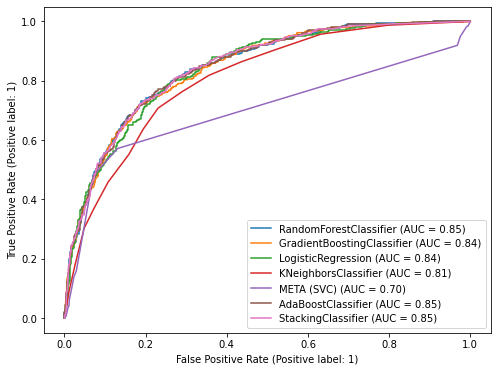

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

# Определение матрицы предсказаний для обучающих данных
meta_mtrx = np.empty((y_train.shape[0], len(classifiers)))

for n, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_scaled, y_train)
    # Заполнение матрицы значениями предсказаний моделей на обучающих данных
    meta_mtrx[:, n] = clf.predict(X_train_scaled)
    # Отбражение кривой на графике
    plot_roc_curve(clf, X_test_scaled, y_test, ax=ax, name=name)

# Обучение мета-модели
meta_model = meta.fit(meta_mtrx, y_train)

# Определение матрицы предсказаний для тестовых данных
meta_mtrx = np.empty((y_test.shape[0], len(classifiers)))

# Заполнение матрицы значениями предсказаний моделей на тестовых данных
for n, (name, clf) in enumerate(classifiers.items()):
    meta_mtrx[:, n] = clf.predict(X_test_scaled)

plot_roc_curve(meta_model, meta_mtrx, y_test, ax=ax, name='META (SVC)')

# Отображение на графике AdaBoostClassifier
ada.fit(X_train_scaled, y_train)
plot_roc_curve(ada, X_test_scaled, y_test, ax=ax, name='AdaBoostClassifier')

# Отображение на графике StackingClassifier
reg.fit(X_train_scaled, y_train)
plot_roc_curve(reg, X_test_scaled, y_test, ax=ax, name='StackingClassifier')

plt.show()

Анализ качества по точностным характеристикам

In [53]:
# Определение матрицы предсказаний для обучающих данных
meta_mtrx = np.empty((y_train.shape[0], len(classifiers))) 

for n, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_scaled, y_train)
    # Заполнение матрицы значениями предсказаний моделей на обучающих данных
    meta_mtrx[:, n] = clf.predict(X_train_scaled)
    print('Точность модели {}:'.format(name), accuracy_score(y_test, clf.predict(X_test_scaled)))
    print('ROC_AUC:', roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]), '\n')    

# Обучение мета-модели
meta_model = meta.fit(meta_mtrx, y_train)

# Определение матрицы предсказаний для тестовых данных
meta_mtrx = np.empty((y_test.shape[0], len(classifiers))) 

# Заполнение матрицы значениями предсказаний моделей на тестовых данных
for n, (name, clf) in enumerate(classifiers.items()):
    meta_mtrx[:, n] = clf.predict(X_test_scaled)

# Мета-алгоритм
print('Точность мета-модели SVC:', accuracy_score(y_test, meta_model.predict(meta_mtrx)))
print('ROC_AUC:', roc_auc_score(y_test, meta_model.decision_function(meta_mtrx)), '\n')

# AdaBoostClassifier   
print('Точность модели AdaBoostClassifier:', accuracy_score(y_test, ada.predict(X_test_scaled)))
print('ROC_AUC:', roc_auc_score(y_test, ada.predict_proba(X_test_scaled)[:, 1]), '\n')

# AdaBoostClassifier   
print('Точность модели StackingClassifier:', accuracy_score(y_test, reg.predict(X_test_scaled)))
print('ROC_AUC:', roc_auc_score(y_test, reg.predict_proba(X_test_scaled)[:, 1]), '\n')

Точность модели RandomForestClassifier: 0.8099062918340026
ROC_AUC: 0.8455944653267786 

Точность модели GradientBoostingClassifier: 0.8052208835341366
ROC_AUC: 0.8420009689811232 

Точность модели LogisticRegression: 0.8005354752342704
ROC_AUC: 0.84059342057225 

Точность модели KNeighborsClassifier: 0.7771084337349398
ROC_AUC: 0.8058157236704638 

Точность мета-модели SVC: 0.8099062918340026
ROC_AUC: 0.7020784874709822 

Точность модели AdaBoostClassifier: 0.8078982597054887
ROC_AUC: 0.8454957302834155 

Точность модели StackingClassifier: 0.8065595716198126
ROC_AUC: 0.845219042545619 



**В курсовой работе приведен анализ данных, определен наилучший датасет для обучения моделей, обчено несколько классификаторов и для них подобраны наилучшие параметры. Результаты работы классификаторов сильно не отличаются. Наилучшим среди всех классификаторов по метрике ROC_AUC стал AdaBoostClassifier, показавший величину данной метрики ~0.85 и точность ~0.81. Приблизительно такие же метрики показал StackingClassifier и RandomForestClassifier.**